===================================================================

Determining and plotting the altitude/azimuth of the Canopus and Sun

In this notebook I an going to calculate the altitude/azimuth of the Canopus and Sun 
seen from an observer in Tai Mountain from -3000BC to 2000AD.

The main procedures are listed as follow:
(1) Calculate the time-dependent position of the Canopus in the ICRF2, using the position 
    and proper motion data in Hipparcus catalog (Hipparcos, the New Reduction (van Leeuwen, 2007) );
(2) Calculate the tim
e-dependent position of the Sun in the ICRF2, using the ephemeris DE431;
(3) Calculate the transformation metrix between ICRF2 and ITRF, only considering the effect of Precession;
(4) Determine the altitude/azimuth of the Canopus and Sun

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, ICRS

In [2]:
# Time system
time0 = Time("J2000.0")
print(time0.utc)

J2000.000


In [3]:
# Input the position and proper motion information of the Canopus from Hiparcus
hip30438 = SkyCoord(ra=95.98787790*u.deg, dec=-52.69571787*u.deg,
                    frame="icrs")

In [4]:
shangqiu = EarthLocation(lat=36.2*u.deg, lon=117.1*u.deg, height=1500*u.m)
utcoffset = + 8*u.hour  # Daylight Time
time = Time("2018-9-22 23:00:00") - utcoffset

In [5]:
hip30438altaz = hip30438.transform_to(AltAz(obstime=time, location=shangqiu))
print("HIP 30438's Altitude = {0.alt:.2}".format(hip30438altaz))

HIP 30438's Altitude = -4.1e+01 deg


In [6]:
midnight = Time("2018-9-23 00:00:00") - utcoffset
delta_midnight = np.linspace(-2, 10, 100) * u.hour
frame_July13night = AltAz(obstime=midnight + delta_midnight,
                          location=shangqiu)
m33altazs_July13night = hip30438.transform_to(frame_July13night)

In [7]:
m33airmasss_July13night = m33altazs_July13night.secz

In [8]:
from astropy.coordinates import get_sun
delta_midnight = np.linspace(-12, 12, 1000)*u.hour
times_July12_to_13 = midnight + delta_midnight
frame_July12_to_13 = AltAz(obstime=times_July12_to_13, location=shangqiu)
sunaltazs_July12_to_13 = get_sun(times_July12_to_13).transform_to(frame_July12_to_13)

In [9]:
hip30438altazs_July12_to_13 = hip30438.transform_to(frame_July12_to_13)

Text(0,0.5,'Altitude [deg]')

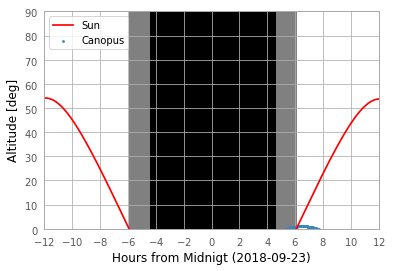

In [10]:
plt.plot(delta_midnight, sunaltazs_July12_to_13.alt, color='r', label='Sun')
plt.scatter(delta_midnight, hip30438altazs_July12_to_13.alt,
            label='Canopus', lw=0, s=8)
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sunaltazs_July12_to_13.alt < -0*u.deg, color='0.5', zorder=0)
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sunaltazs_July12_to_13.alt < -18*u.deg, color='k', zorder=0)
plt.legend(loc='upper left')
plt.xlim(-12, 12)
plt.xticks(np.arange(13)*2 -12)
plt.ylim(0, 90)
plt.xlabel('Hours from Midnigt (2018-09-23)')
plt.ylabel('Altitude [deg]')
# plt.savefig("/Users/Neo/Desktop/temp1.png", dpi=100)

In [21]:
mask = (sunaltazs_July12_to_13.alt < -0*u.deg) & (hip30438altazs_July12_to_13.alt>0)
observable_time = delta_midnight[mask]
# observable_time
beg_time, end_time = observable_time.min(), observable_time.max()
print(beg_time, end_time)
print(end_time - beg_time)

5.417417417417418 h 6.0660660660660675 h
0.6486486486486491 h
